In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [6]:
from time import sleep
from time import time
t0 = time()

# recherche sur plusieurs pages
nb_pages = 5
liste_url = []
page = 1
star = 1
while page <= nb_pages :
    liste_url.append('https://fr.trustpilot.com/review/www.amazon.fr?stars='+str(star))
    page = page + 1
    star = star + 1

liste_pays = []
liste_note = []
liste_titre_commentaire = []
liste_commentaire = []

for url in liste_url:
    html = requests.get(url)
    soup = BeautifulSoup(html.text, 'html.parser')
    comment = soup.find_all('div', {"class" : "styles_cardWrapper__LcCPA styles_show__HUXRb styles_reviewCard__9HxJJ"})
    for nb_avis in range(len(comment)):
        liste_pays.append(comment[nb_avis].find('div', {"class" : "typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua"}).span.text)
        liste_note.append(comment[nb_avis].find('div', {"class" : "styles_reviewHeader__iU9Px"})['data-service-review-rating'])
        liste_titre_commentaire.append(comment[nb_avis].find({"h2" : "typography_heading-s__f7029 typography_appearance-default__AAY17"}).text)
        liste_commentaire.append(comment[nb_avis].find('section', {"class" : "styles_reviewContentwrapper__zH_9M"}).text)
    sleep(2)

dico = {'pays' : liste_pays, 'note' : liste_note, 'titre' : liste_titre_commentaire, 'commentaire' : liste_commentaire}
df = pd.DataFrame(dico)

print('le temps de calcul est de {:.2f} secondes'.format(time()-t0))

le temps de calcul est de 12.92 secondes


In [7]:
df.shape

(100, 4)

C:\Users\t.fourtouill\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='note', ylabel='count'>

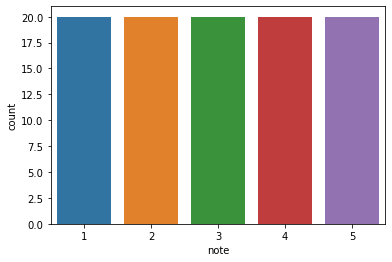

In [8]:
import seaborn as sns
sns.countplot(df['note'])

In [9]:
df.to_csv('datasets/SatisfactionClients/amazon_test1.csv')